## Importing necessary libraries

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Exploratory Data Analysis
### Cleaning the DataSet and getting it ready for model training

In [9]:
# Importing the train dataset
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [11]:
# Importing the test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# Merge both train and test data
df = pd.concat([df_train,df_test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Importing 'gender_submission.csv' file
submit_df = pd.read_csv('gender_submission.csv')
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
# Basic exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Handling categorical values

In [20]:
# Handling categorical feature 'Gender'
pd.get_dummies(df['Sex']).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [21]:
df['Sex'] = df['Sex'].map({'female':0,'male':1})

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Handling categorical feature 'Embarked'
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df_embarked = pd.get_dummies(df['Embarked'],drop_first=True).astype(int)

In [25]:
df_embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
df = pd.concat([df,df_embarked],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [27]:
df = df.loc[:, ~df.columns.duplicated()]

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,0,1


In [30]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
def extract_cabin_info(cabin):
  if pd.isnull(cabin):
    return np.nan, np.nan
  else:
    try:
      cabin_num = cabin[1:]
      cabin_num = int(cabin_num)  # Convert to integer if possible
    except ValueError:
      cabin_num = np.nan
    return cabin[0], cabin_num

deck, cabin_number = zip(*df['Cabin'].apply(extract_cabin_info))

# Assigning extracted values to new columns (avoid chained assignment)
df['Deck'] = deck
df['CabinNumber'] = cabin_number

# Handle missing values (avoid inplace=True)
df['Deck'].fillna('Unknown', inplace=False)  # Create a copy and fill
df['CabinNumber'].fillna(-1, inplace=False)  # Create a copy and fill

0       -1.0
1       85.0
2       -1.0
3      123.0
4       -1.0
       ...  
413     -1.0
414    105.0
415     -1.0
416     -1.0
417     -1.0
Name: CabinNumber, Length: 1309, dtype: float64

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,Deck,CabinNumber
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0,C,85.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,C,123.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,0,0,C,105.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,0,1,NaN,NaN


In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,Deck,CabinNumber
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0,C,85.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1,C,123.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,0,0,C,105.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,0,1,NaN,NaN


In [34]:
# Dropping Columns 'Name' and 'Ticket'
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Q            1309 non-null   int32  
 11  S            1309 non-null   int32  
 12  Deck         295 non-null    object 
 13  CabinNumber  248 non-null    float64
dtypes: float64(4), int32(2), int64(5), object(3)
memory usage: 143.2+ KB


In [36]:
# Dropping the column 'Embarked'
df.drop(['Embarked'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Q            1309 non-null   int32  
 10  S            1309 non-null   int32  
 11  Deck         295 non-null    object 
 12  CabinNumber  248 non-null    float64
dtypes: float64(4), int32(2), int64(5), object(2)
memory usage: 132.9+ KB


In [38]:
df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [39]:
df_deck = pd.get_dummies(df['Deck']).astype(int)

In [40]:
df_deck

,A,B,C,D,E,F,G,T
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0
414,0,0,1,0,0,0,0,0
415,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0


In [41]:
df = pd.concat([df,df_deck],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,...,Deck,CabinNumber,A,B,C,D,E,F,G,T
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,C,85.0,0,0,1,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,C,123.0,0,0,1,0,0,0,0,0
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [42]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,...,Deck,CabinNumber,A,B,C,D,E,F,G,T
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,C,85.0,0,0,1,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,C,123.0,0,0,1,0,0,0,0,0
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,1,NaN,0,0,8.0500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
414,1306,NaN,1,0,39.0,0,0,108.9000,C105,0,...,C,105.0,0,0,1,0,0,0,0,0
415,1307,NaN,3,1,38.5,0,0,7.2500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0
416,1308,NaN,3,1,NaN,0,0,8.0500,NaN,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Q            1309 non-null   int32  
 10  S            1309 non-null   int32  
 11  Deck         295 non-null    object 
 12  CabinNumber  248 non-null    float64
 13  A            1309 non-null   int32  
 14  B            1309 non-null   int32  
 15  C            1309 non-null   int32  
 16  D            1309 non-null   int32  
 17  E            1309 non-null   int32  
 18  F            1309 non-null   int32  
 19  G           

In [44]:
df.drop(['Cabin'],axis=1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Q            1309 non-null   int32  
 9   S            1309 non-null   int32  
 10  Deck         295 non-null    object 
 11  CabinNumber  248 non-null    float64
 12  A            1309 non-null   int32  
 13  B            1309 non-null   int32  
 14  C            1309 non-null   int32  
 15  D            1309 non-null   int32  
 16  E            1309 non-null   int32  
 17  F            1309 non-null   int32  
 18  G            1309 non-null   int32  
 19  T           

In [46]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              1
Q                 0
S                 0
Deck           1014
CabinNumber    1061
A                 0
B                 0
C                 0
D                 0
E                 0
F                 0
G                 0
T                 0
dtype: int64

In [47]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

In [48]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              1
Q                 0
S                 0
Deck           1014
CabinNumber    1061
A                 0
B                 0
C                 0
D                 0
E                 0
F                 0
G                 0
T                 0
dtype: int64

In [49]:
df.loc[:, 'Deck'] = df['Deck'].fillna(-1)
df.loc[:, 'CabinNumber'] = df['CabinNumber'].fillna(-1)

In [50]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Q                0
S                0
Deck             0
CabinNumber      0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
T                0
dtype: int64

In [51]:
df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].median())

In [52]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Q                0
S                0
Deck             0
CabinNumber      0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
T                0
dtype: int64

In [53]:
df.drop(['Deck'],axis=1,inplace=True)

## Data Preprocessing

### Getting the data ready for the model

#### Splitting the df into test_df and train_df

In [56]:
# Split the merged dataframe back into train and test based on 'Survived' column
train = df[df['Survived'].notna()]  # Rows where 'Survived' is not NaN
test = df[df['Survived'].isna()]    # Rows where 'Survived' is NaN

# Drop 'Survived' column from the test set as it's not part of the original test set
test = test.drop(columns=['Survived'])

In [57]:
# Features and target for the training set
X_train = train.drop(columns=['Survived', 'PassengerId'])
y_train = train['Survived']

# Prepare the test set
X_test = test.drop(columns=['PassengerId'])

In [58]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,CabinNumber,A,B,C,D,E,F,G,T
0,3,1,22.0,1,0,7.2500,0,1,-1.0,0,0,0,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,0,0,85.0,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,-1.0,0,0,0,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,1,123.0,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,1,-1.0,0,0,0,0,0,0,0,0


In [59]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,CabinNumber,A,B,C,D,E,F,G,T
0,3,1,34.5,0,0,7.8292,1,0,-1.0,0,0,0,0,0,0,0,0
1,3,0,47.0,1,0,7.0000,0,1,-1.0,0,0,0,0,0,0,0,0
2,2,1,62.0,0,0,9.6875,1,0,-1.0,0,0,0,0,0,0,0,0
3,3,1,27.0,0,0,8.6625,0,1,-1.0,0,0,0,0,0,0,0,0
4,3,0,22.0,1,1,12.2875,0,1,-1.0,0,0,0,0,0,0,0,0


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Q            891 non-null    int32  
 7   S            891 non-null    int32  
 8   CabinNumber  891 non-null    float64
 9   A            891 non-null    int32  
 10  B            891 non-null    int32  
 11  C            891 non-null    int32  
 12  D            891 non-null    int32  
 13  E            891 non-null    int32  
 14  F            891 non-null    int32  
 15  G            891 non-null    int32  
 16  T            891 non-null    int32  
dtypes: float64(3), int32(10), int64(4)
memory usage: 90.5 KB


#### Feature Scaling

In [62]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building the Neural Network

### We will build a Neural Network and use Forward Propagation Algorithm for this case

In [64]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer (16 neurons, ReLU activation)
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))

# Optional: Add a Dropout layer to reduce overfitting (Drop 20% of neurons)
model.add(Dropout(0.2))

# Second hidden layer (8 neurons, ReLU activation)
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron for binary classification, sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model (Binary crossentropy for loss, Adam optimizer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model

In [66]:
# Training the model on the scaled training data
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4482 - loss: 0.8364 - val_accuracy: 0.6089 - val_loss: 0.7650
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5798 - loss: 0.7410 - val_accuracy: 0.6369 - val_loss: 0.7023
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 0.7097 - val_accuracy: 0.6592 - val_loss: 0.6520
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6176 - loss: 0.6757 - val_accuracy: 0.6648 - val_loss: 0.6127
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 0.6253 - val_accuracy: 0.6704 - val_loss: 0.5788
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6354 - loss: 0.6056 - val_accuracy: 0.7039 - val_loss: 0.5520
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 0.6030 - val_accuracy: 0.7095 - val_loss: 0.5354
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6602 - loss: 0.5693 - val_accuracy: 0.7151 - 

## Evaluating the Model

In [68]:
# Evaluating the model's accuracy on the training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=2)

print(f'Training Accuracy: {train_accuracy}')

28/28 - 0s - 2ms/step - accuracy: 0.8552 - loss: 0.3666
Training Accuracy: 0.8552188277244568


## Making Predictions of the Test Data

In [70]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [71]:
# Preparing the submission file
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": y_pred.flatten()
})

# Saving the submission file to CSV
submission.to_csv('submission.csv', index=False)

## Analysing the Model Performance

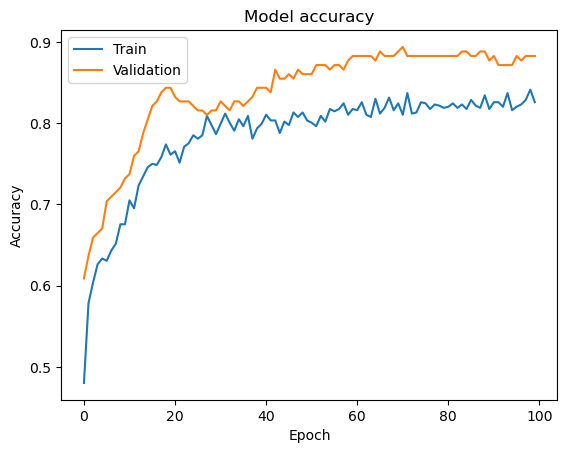

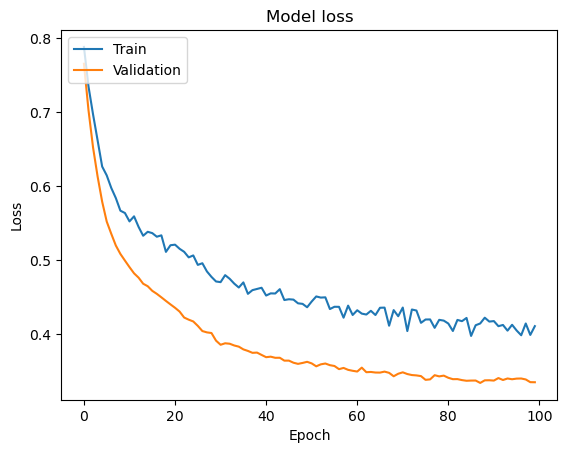

In [73]:
# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
